In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#### Read, Display and Saving

(3236, 4854, 3)
[[[45 74 58]
  [46 75 59]
  [50 82 65]
  ...
  [41 80 64]
  [46 85 69]
  [38 77 61]]

 [[48 77 61]
  [51 80 64]
  [54 86 69]
  ...
  [45 84 68]
  [38 77 61]
  [38 77 61]]

 [[49 78 62]
  [50 79 63]
  [52 84 67]
  ...
  [45 84 68]
  [36 75 59]
  [38 77 61]]

 ...

 [[27 55 42]
  [25 53 40]
  [24 51 41]
  ...
  [21 65 48]
  [16 60 43]
  [21 66 47]]

 [[22 49 39]
  [26 53 43]
  [21 48 38]
  ...
  [23 67 50]
  [22 66 49]
  [21 66 47]]

 [[14 41 31]
  [14 41 31]
  [17 44 34]
  ...
  [23 67 50]
  [27 71 54]
  [22 67 48]]]


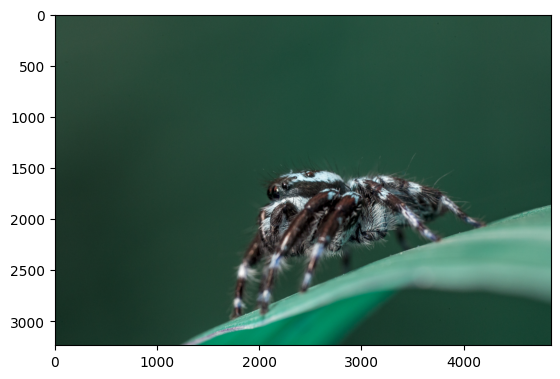

In [7]:
dir = "img03.jpeg"
img1 = cv2.imread(dir)
print(img1.shape)
print(img1)
plt.imshow(img1)

(3236, 4854)
[[66 67 73 ... 71 76 68]
 [69 72 77 ... 75 68 68]
 [70 71 75 ... 75 66 68]
 ...
 [48 46 45 ... 55 50 55]
 [43 47 42 ... 57 56 55]
 [35 35 38 ... 57 61 56]]


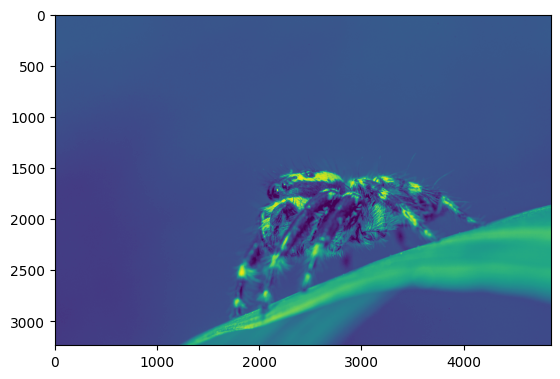

In [8]:
img1 = cv2.imread(dir, cv2.IMREAD_GRAYSCALE)
print(img1.shape)
print(img1)
plt.imshow(img1)

#### Color Images

In [58]:
def swapBGR2RGB(img):
    img = img[:, :, ::-1]
    return img

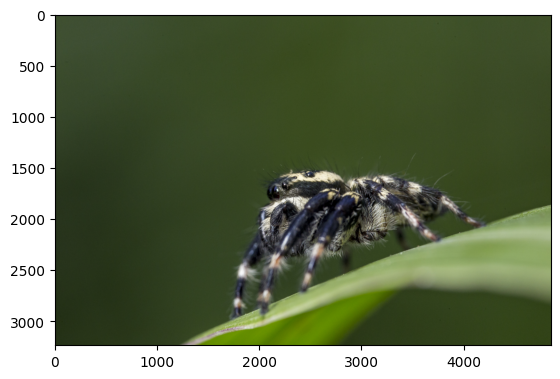

In [61]:
dir = "img03.jpeg"
img1 = swapBGR2RGB(cv2.imread(dir))
plt.imshow(img1)

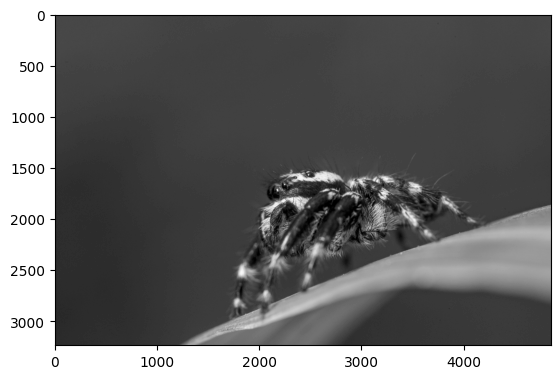

In [51]:
dir = "img03.jpeg"
img1 = cv2.imread(dir, 0)
plt.imshow(img1, cmap='gray')

#### Basic Image Manipulations

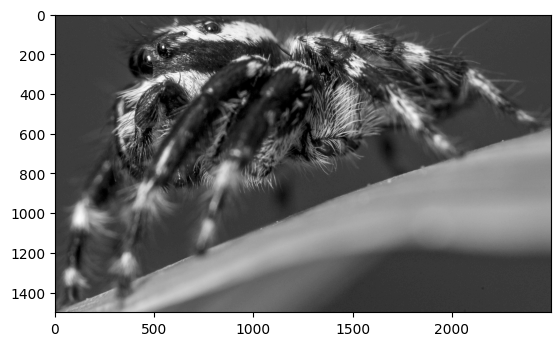

In [108]:
# Crop
img1 = cv2.imread(dir, 0)
img1 = img1[1500:3000, 1700:4200]
plt.imshow(img1, cmap='gray')

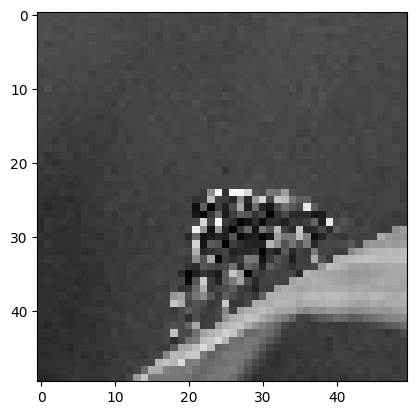

In [52]:
# Resize
img2 = cv2.resize(img1, (50, 50))
plt.imshow(img2, cmap='gray')

#### Chuyển RGB thành Grayscale

$$I'(x,y)=\frac{a.I_1(x,y) + b.I_2(x,y) + c.I_3(x,y)}{(a + b + c)}$$
- a + b + c = 1
- R, G, B là giá trị điểm ảnh ở 3 kênh màu

In [19]:
def grayscale(frame, n=1): # rgb
    img = np.zeros((len(frame[:]), len(frame[0][:])), dtype=np.uint8)
    for i in range(len(frame[:])):
        for j in range(len(frame[i][:])):
            r, g, b = frame[i][j][:]
            img[i][j] = round((0.299 * r + 0.587 * g + 0.114 * b)/n)
    return img

In [99]:
grayscale_img = grayscale(cv2.imread("img03.jpeg"))

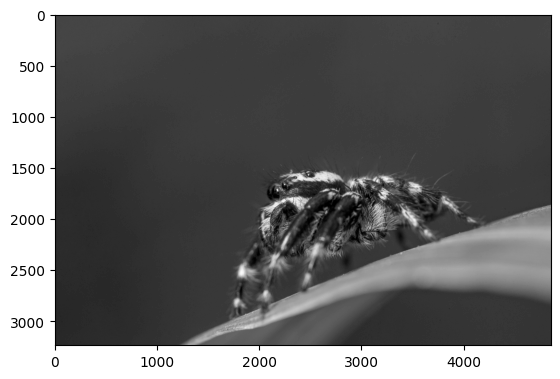

In [100]:
plt.imshow(grayscale_img, cmap='gray')

In [101]:
grayscale_img = grayscale(cv2.imread("img03.jpeg"), 100)

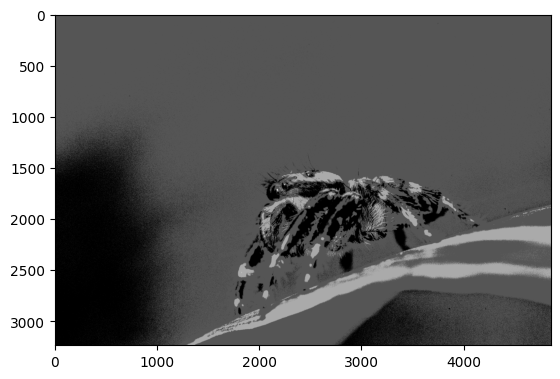

In [102]:
plt.imshow(grayscale_img, cmap='gray')

#### Tăng giảm tương phản

Sử dụng gamma để điều chỉnh tương phản
$$I'(x,y)=I(x,y)^\gamma$$
- $\gamma$ > 1: tăng
- $\gamma$ < 1: giảm
- $\gamma$ = 1: không đổi

In [39]:
def gamma_constract(img, gamma):
    img = np.power(img, gamma)
    max_val = np.max(img.ravel())
    img = img/max_val * 255
    img = img.astype(np.uint8)    
    img[img>255] = 255
    img[img<0] = 0
    return img

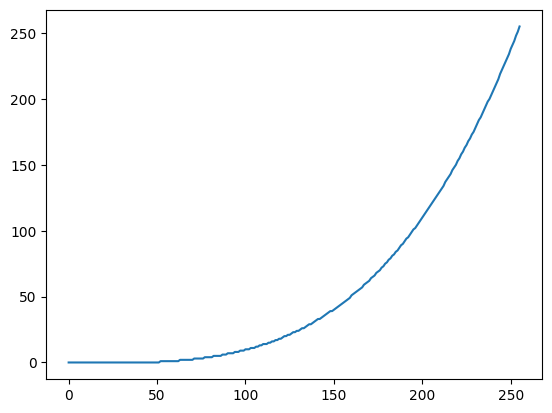

In [35]:
# plot the gamma
x = np.arange(0, 256, 1)
y = gamma_constract(x, 3.45)
plt.plot(x, y)
plt.show()


In [41]:
# look up table
%time
img = cv2.imread("img03.jpeg",0)
look_up_table = np.zeros(256, dtype = 'uint8')
for i in range(256):
    look_up_table[i] = gamma_constract(i, 1.999)
img = cv2.LUT(img, look_up_table)
plt.imshow(img, cmap='gray')

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\karin\AppData\Local\Temp\ipykernel_17096\174892456.py:4: RuntimeWarning: invalid value encountered in double_scalars
  img = img/max_val * 255


TypeError: 'numpy.uint8' object does not support item assignment

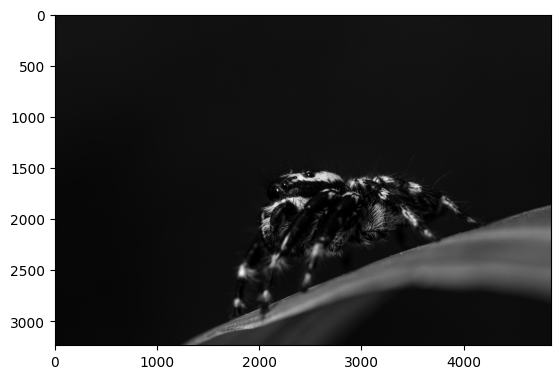

In [14]:
img = cv2.imread("img03.jpeg",0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = gamma_constract(img, 1.999)
plt.imshow(img, cmap='gray')

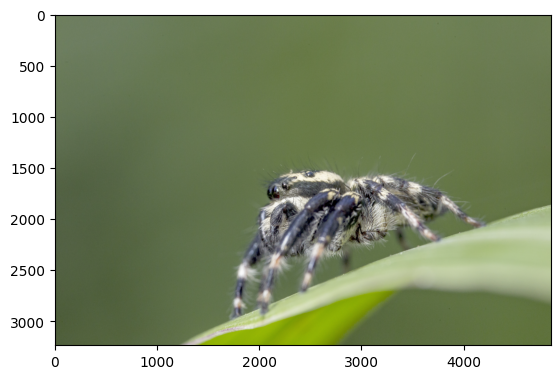

In [121]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = gamma_constract(img, 0.6)
plt.imshow(img)

#### Tăng giảm sáng

$$I'(x,y)= \alpha.I(x,y) + \beta$$
- $\alpha$ > 0: tăng
- $\alpha$ < 0: giảm
- $\alpha$ và $\beta$ là 2 hằng số nhập vào, alpha người dùng có thể nhập lớn hơn 0, beta là giá trị pixel cộng vào

In [17]:
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int) 
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return img_new

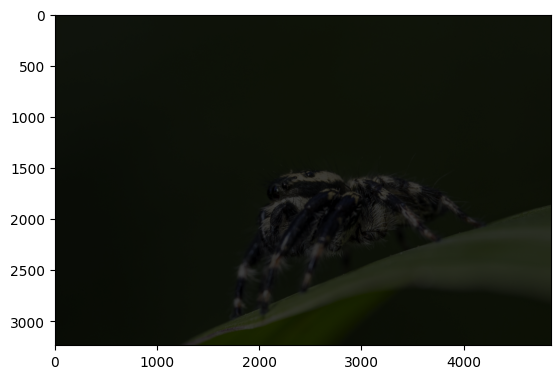

In [21]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = change_brightness(img, 0.25, 0)
plt.imshow(img)

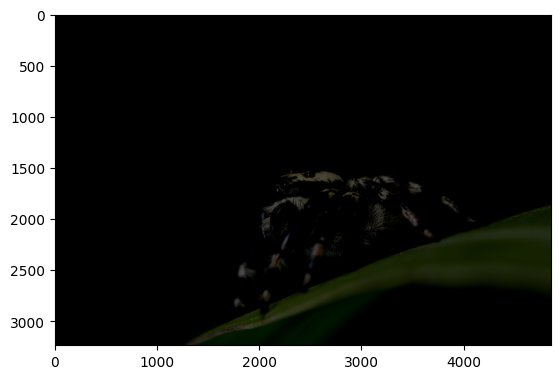

In [80]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = change_brightness(img, 0.5, -50)
plt.imshow(img)

#### Ảnh âm bản

$$I'(x,y) = 255 - I(x,y)$$

In [20]:
def negative(frame):
    for i in range(len(frame[:])):
        for j in range(len(frame[i][:])):
            frame[i][j] = 255 - frame[i][j] 
    return frame

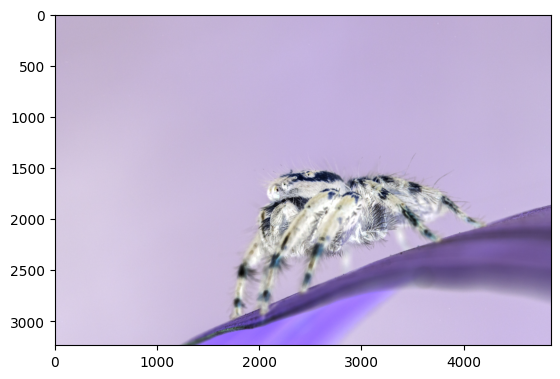

In [110]:
img = cv2.imread("img03.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = negative(img)
plt.imshow(img)

#### Tách ngưỡng

$$\begin{equation}I'(x,y) = \begin{cases}
min (\text{thường là giá trị} = 0) & \text{nếu I(x,y)} > Thresshold \\
max (\text{thường là giá trị} = 255) & \text{nếu I(x,y)} <= Thresshold \\
\end{cases}
\end{equation}$$

In [117]:
# tách ngưỡng
def threshold(img, thresshold):
    img[img>thresshold] = 255
    img[img<=thresshold] = 0
    return img

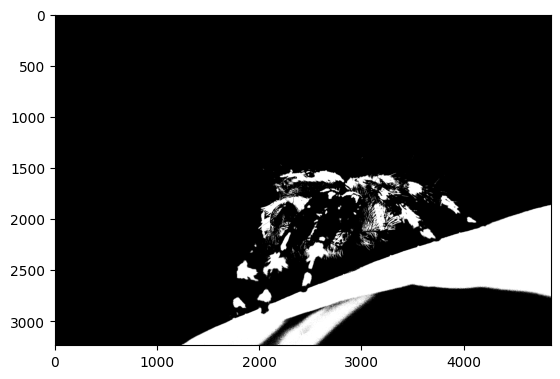

In [118]:
img = cv2.imread("img03.jpeg", 0)
img = threshold(img, 100)
plt.imshow(img, cmap='gray')

#### Tách ngưỡng tự động

In [133]:
def threshold_auto(img):
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.Canny(img, 50, 100)
    return img

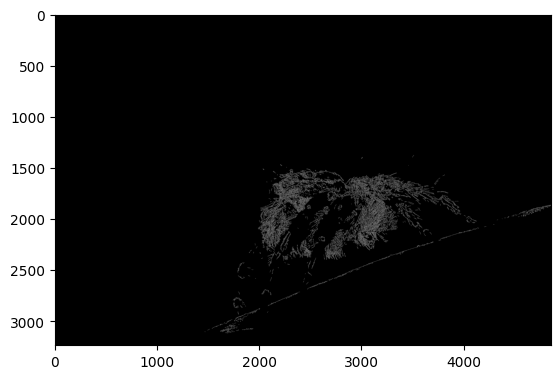

In [134]:
img = cv2.imread("img03.jpeg", 0)
img = threshold_auto(img)
plt.imshow(img, cmap='gray')

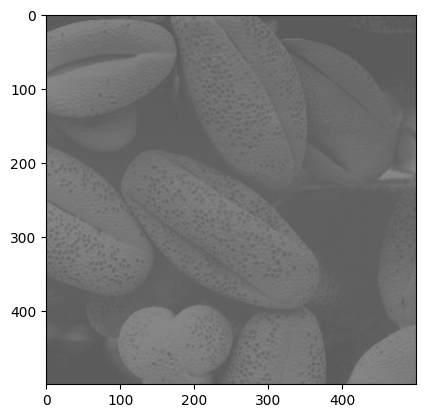

In [43]:
img = cv2.imread("img2.jpg")
plt.imshow(img)

In [32]:
img = img[0]

In [44]:
img

array([[[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [105, 105, 105]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [101, 101, 101]],

       ...,

       [[ 96,  96,  96],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [122, 122, 122],
        [120, 120, 120],
        [121, 121, 121]],

       [[ 97,  97,  97],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [119, 119, 119]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [118, 118, 118]]

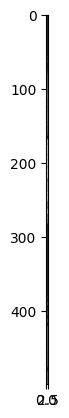

In [34]:
plt.imshow(img)